In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az

import matplotlib.pyplot as plt
import pymc3 as pm

from sklearn.linear_model import LinearRegression

In [3]:
raw_data = pd.read_csv('data/flats.csv')

In [4]:
raw_data.head()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
0,8056,2750000,11,11.0,1.0,12.0
1,8154,7100000,45,27.0,2.0,6.0
2,8287,11700000,77,50.0,3.0,8.0
3,8387,10400000,56,29.0,2.0,10.0
4,8391,6200000,31,21.0,1.0,5.0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6042 non-null   int64  
 1   price_doc   6042 non-null   int64  
 2   full_sq     6042 non-null   int64  
 3   life_sq     6042 non-null   float64
 4   num_room    6042 non-null   float64
 5   kitch_sq    6042 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 283.3 KB


In [6]:
data = raw_data.drop('Unnamed: 0', axis=1)
data['price_doc'] = np.log(data['price_doc'])

In [7]:
data.describe()

,price_doc,full_sq,life_sq,num_room,kitch_sq
count,6042.000000,6042.000000,6042.000000,6042.000000,6042.000000
mean,15.773452,53.374545,33.198941,1.997021,7.391096
std,0.692646,24.011941,20.190005,0.889523,3.806198
min,13.122363,1.000000,0.000000,0.000000,0.000000
25%,15.573368,38.000000,20.000000,1.000000,5.000000
50%,15.816991,46.000000,29.000000,2.000000,7.000000
75%,16.166886,63.000000,42.000000,3.000000,9.000000
max,18.370676,637.000000,637.000000,17.000000,96.000000


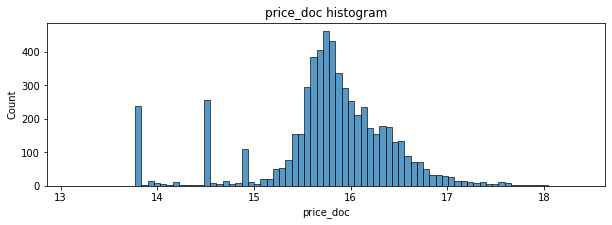

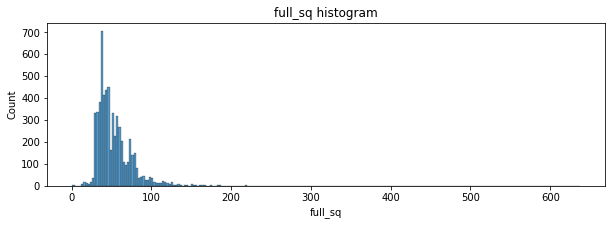

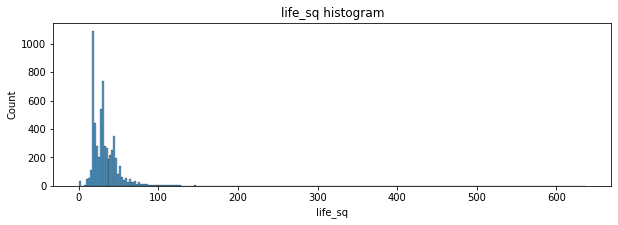

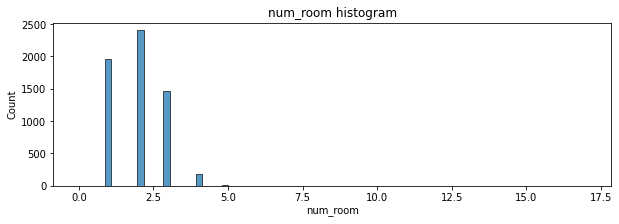

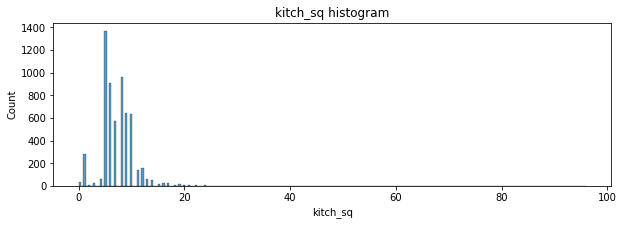

In [8]:
# Визуализация распределения целевой переменной и признаков
for col in data.columns:
    plt.figure(figsize=(10, 3))
    sns.histplot(data, x=col)
    plt.title(f'{col} histogram');

In [10]:
# Для уменьшения времени расчета взята только первая тысяча объектов для расчета
part_data = data[:999]
part_data.head()

,price_doc,full_sq,life_sq,num_room,kitch_sq
0,14.827111,11,11.0,1.0,12.0
1,15.775605,45,27.0,2.0,6.0
2,16.275099,77,50.0,3.0,8.0
3,16.157316,56,29.0,2.0,10.0
4,15.640060,31,21.0,1.0,5.0


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Mult

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2064 seconds.
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the m

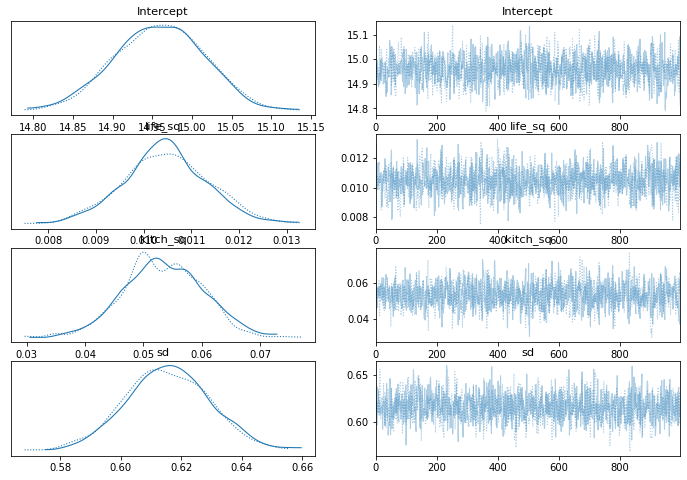

In [11]:
with pm.Model() as linear_model:
    pm.glm.GLM.from_formula('price_doc ~ life_sq + kitch_sq', part_data, family = pm.glm.families.Normal())
    trace = pm.sample()
    
az.plot_trace(trace);

In [12]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,14.959,0.056,14.858,15.064,0.002,0.001,1145.0,1222.0,1.0
life_sq,0.010,0.001,0.009,0.012,0.000,0.000,1073.0,986.0,1.0
kitch_sq,0.053,0.007,0.041,0.066,0.000,0.000,1174.0,974.0,1.0
sd,0.616,0.014,0.588,0.641,0.000,0.000,1162.0,1007.0,1.0


In [24]:
pm_res = pd.DataFrame(pm.summary(trace))

Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [14]:
lr_model = LinearRegression()
lr_model.fit(part_data[['life_sq', 'kitch_sq']], part_data['price_doc'])

LinearRegression()

In [30]:
# Сравнение коэффициентов моделей
pd.DataFrame({
    'Bayesian Linear Regression (mean values)':[pm_res['mean'][1], pm_res['mean'][2], pm_res['mean'][0]],
    'Sklearn Linear Regression':[lr_model.coef_[0], lr_model.coef_[1], lr_model.intercept_]},
             index=['life_sq', 'kitch_sq', 'intercept']
             )

,Bayesian Linear Regression (mean values),Sklearn Linear Regression
life_sq,0.010,0.010442
kitch_sq,0.053,0.053284
intercept,14.959,14.960540
